<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Анализ-обьема-продаж" data-toc-modified-id="Анализ-обьема-продаж-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ обьема продаж</a></span><ul class="toc-item"><li><span><a href="#Группируем-по-холдингам" data-toc-modified-id="Группируем-по-холдингам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Группируем по холдингам</a></span></li><li><span><a href="#Группируем-по-типу-рекламы" data-toc-modified-id="Группируем-по-типу-рекламы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Группируем по типу рекламы</a></span></li><li><span><a href="#Группируем-по-группе-рекламодателя" data-toc-modified-id="Группируем-по-группе-рекламодателя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Группируем по группе рекламодателя</a></span></li><li><span><a href="#Группируем-по-каналу" data-toc-modified-id="Группируем-по-каналу-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Группируем по каналу</a></span></li><li><span><a href="#Группируем-по-рекламодателю" data-toc-modified-id="Группируем-по-рекламодателю-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Группируем по рекламодателю</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Прогноз-продаж" data-toc-modified-id="Прогноз-продаж-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Прогноз продаж</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Предсказание</a></span></li></ul></li><li><span><a href="#Кластеризация-рекламодателей" data-toc-modified-id="Кластеризация-рекламодателей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация рекламодателей</a></span><ul class="toc-item"><li><span><a href="#По-количеству-месяцев-с-заказами" data-toc-modified-id="По-количеству-месяцев-с-заказами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>По количеству месяцев с заказами</a></span></li><li><span><a href="#По-обьему-продаж" data-toc-modified-id="По-обьему-продаж-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>По обьему продаж</a></span></li></ul></li></ul></div>

# Описание задания

Мне была предоставлена выгрузка с данными по объемам продаж на разных телеканалах за 2021 год и 9 месяцев 2022 года. Телеканалы принадлежат разным Холдингам.

Необходимо:
- проанализировать данные в различных разрезах
- визуализировать полученные результаты
- сделать выводы
- сделать прогноз продаж на 2022 год по Холдингам
- разбить рекламодателей на кластеры

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/dariasokolovska/Downloads/Выгрузка для собеседования.xlsx - Выгрузка.csv', header=2)

In [3]:
df

,Распространение,Признак,Холдинг,Тип,Группа рекламодателя,Канал,Рекламодатель,1,2,3,...,12,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1
0,Сетевое,Фед,ГХ,Классика,Букмекер,НВ,WINLINE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Сетевое,Фед,ГХ,Классика,Букмекер,НВ,ОЛИМП (БУКМЕКЕРСКАЯ КОНТОРА),"68,3","71,2",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Сетевое,Фед,ГХ,Классика,Букмекер,ТТ,ОЛИМП (БУКМЕКЕРСКАЯ КОНТОРА),"44,8","37,0","37,3",...,"48,8","42,4","39,9","30,2","29,6","35,7",NaN,NaN,NaN,NaN
3,Сетевое,Фед,ГХ,Классика,Букмекер,Т3,ОЛИМП (БУКМЕКЕРСКАЯ КОНТОРА),"20,9","18,0","19,2",...,"29,2","23,8","27,2","25,1","25,9","32,2",NaN,NaN,NaN,NaN
4,Сетевое,Фед,ГХ,Классика,Букмекер,ПА,ОЛИМП (БУКМЕКЕРСКАЯ КОНТОРА),"22,3","16,1","18,4",...,"20,4","22,7","20,2","21,9","22,2","22,9",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626,Сетевое,Фед,Пе,Спонсорство,Другие,СПС,ДОНИНТУРФЛОТ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Сетевое,Фед,Пе,Спонсорство,Другие,СПС,РАДОНЕЖ (РАДИОСТАНЦИЯ),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6628,Сетевое,Фед,Пе,Спонсорство,Другие,СПС,РИОЛИС,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6629,Сетевое,Фед,Пе,Спонсорство,Другие,СПС,РУССКОЕ ПОЛЕ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.head(-1)

In [5]:
# переименовываем столбцы
df.columns = ['distribution','feature','holding','type','group',\
              'channel','advertiser','2021.01','2021.02','2021.03','2021.04','2021.05',\
              '2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12',\
              '2022.01','2022.02','2022.03','2022.04','2022.05','2022.06','2022.07',\
              '2022.08','2022.09']

In [6]:
# изучаем данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distribution  6630 non-null   object
 1   feature       6630 non-null   object
 2   holding       6630 non-null   object
 3   type          6630 non-null   object
 4   group         6630 non-null   object
 5   channel       6630 non-null   object
 6   advertiser    6630 non-null   object
 7   2021.01       2086 non-null   object
 8   2021.02       2341 non-null   object
 9   2021.03       2631 non-null   object
 10  2021.04       2479 non-null   object
 11  2021.05       2309 non-null   object
 12  2021.06       2278 non-null   object
 13  2021.07       2243 non-null   object
 14  2021.08       2360 non-null   object
 15  2021.09       2617 non-null   object
 16  2021.10       2803 non-null   object
 17  2021.11       2807 non-null   object
 18  2021.12       2738 non-null   object
 19  2022.0

Из-за смены типа файла данные потеряли свой исходный тип. Нужно восстановить

In [7]:
obj_col = df.loc[:, :'advertiser'].columns.to_list()
num_col = df.loc[:, '2021.01':].columns.to_list()

In [8]:
def text_clean_func(text):
    if text is not np.nan:
        text = re.sub(r",", ".", text)
        text = re.sub(r"\xa0", "", text)
        text = re.sub(r"\x20", "", text)
        text = re.sub(r"-", "", text)
        text = text.strip(' ')
    return text

In [9]:
for col in num_col:
    df[col] = df[col].apply(text_clean_func)
    df[col] = df[col].replace('', np.nan)
    df[col] = df[col].astype('float')

/var/folders/xq/8n75t0bs727c5pjlrxfv3r2c0000gp/T/ipykernel_84713/2673507520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(text_clean_func)
/var/folders/xq/8n75t0bs727c5pjlrxfv3r2c0000gp/T/ipykernel_84713/2673507520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('', np.nan)
/var/folders/xq/8n75t0bs727c5pjlrxfv3r2c0000gp/T/ipykernel_84713/2673507520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [10]:
def advertiser_clean_func(text):
    if text is not np.nan:
        text = re.sub(r"\? ", "", text) # избамимся от "? "
    return text

In [11]:
df['advertiser'] = df['advertiser'].apply(advertiser_clean_func)

/var/folders/xq/8n75t0bs727c5pjlrxfv3r2c0000gp/T/ipykernel_84713/2235627129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['advertiser'] = df['advertiser'].apply(advertiser_clean_func)


In [12]:
df.describe()

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
count,2086.000000,2341.000000,2631.000000,2479.000000,2309.000000,2278.000000,2243.00000,2360.000000,2617.000000,2803.000000,...,2738.000000,2290.000000,2509.000000,2350.000000,1576.000000,1379.000000,1491.000000,1528.000000,1700.000000,1662.000000
mean,101.748849,88.145622,83.913455,78.662606,77.653876,79.484065,80.81498,84.067415,81.596943,80.559258,...,86.713404,100.812838,81.749342,80.243915,83.678617,78.235896,78.889269,84.406741,79.628882,83.093502
std,176.179315,144.425540,144.574818,139.040306,128.503252,121.759576,127.48461,141.676359,136.973915,141.078721,...,156.527105,182.046128,140.536032,141.087323,143.977188,119.743393,131.538382,132.996547,129.647573,144.097125
min,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,0.00000,0.100000,0.000000,0.100000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000
25%,17.100000,15.500000,13.000000,10.500000,11.800000,12.725000,14.75000,13.000000,12.500000,10.900000,...,11.900000,15.025000,12.900000,10.200000,12.375000,12.100000,11.250000,13.400000,13.475000,10.900000
50%,46.700000,40.500000,35.100000,31.700000,35.100000,38.400000,36.80000,37.800000,36.400000,32.700000,...,33.400000,40.000000,35.100000,30.450000,32.650000,35.600000,31.200000,37.750000,36.200000,32.600000
75%,113.825000,101.900000,96.750000,87.150000,88.400000,92.550000,92.45000,97.800000,92.100000,85.950000,...,92.575000,110.500000,90.600000,87.725000,88.700000,89.550000,86.650000,94.725000,91.200000,91.900000
max,3317.300000,2327.000000,2979.000000,2350.200000,2051.100000,1359.400000,1828.30000,2797.500000,1981.800000,2154.200000,...,2187.200000,2401.200000,2050.400000,1360.600000,1394.000000,1190.800000,1213.000000,1683.600000,1703.300000,1886.200000


In [13]:
# проверяем дубликаты
df.duplicated().sum()

0

In [14]:
# изучаем уникальные значения в категориальных признаках
print(df['distribution'].unique())
print(df['feature'].unique())
print(df['holding'].unique())
print(df['type'].unique())
print(df['group'].unique())
print(df['channel'].unique())

['Сетевое']
['Фед']
['ГХ' 'СС' 'ВК' 'ПЙ' 'ЮВ' 'Пе']
['Классика' 'Спонсорство']
['Букмекер' 'Другие']
['НВ' 'ТТ' 'Т3' 'ПА' 'Т4' '2' 'МЧ' 'СА' 'СС' 'РН' 'Ч' '5К' 'ДЙ' 'СL' 'Р1'
 'КЬ' '24' '1К' 'КD' 'МЗ' 'Ю' 'ЗА' 'ЦР' 'МР' 'СПС']


В результате выполнения данного этапа я изучила данные из таблицы. Были приведены в норму названия столбцов, типы данных. Выявленно много пропусков в данных, причина такой ситуации не ясна. Принято решение заменить их на ноли, на прогноз это не повлияет.

In [15]:
df = df.fillna(0)

## Анализ обьема продаж

### Группируем по холдингам

In [16]:
hold = df.pivot_table(index = ['holding'], aggfunc = 'sum')
hold 

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
holding,,,,,,,,,,,,,,,,,,,,,
ВК,32862.1,35028.6,34532.6,31902.1,28867.7,28770.0,29718.3,33309.6,38989.8,37441.4,...,43315.4,37292.4,36602.0,26975.2,21803.6,15736.4,19975.4,20752.5,21661.3,22206.9
ГХ,64441.4,62982.6,70635.1,63812.8,56655.6,58029.9,56968.0,61876.6,65235.7,72963.2,...,75815.8,68773.1,63208.2,60411.1,41914.9,34259.1,38042.2,40771.2,43400.3,44943.4
ПЙ,13597.4,14917.9,16351.6,13644.7,11004.8,13765.9,11377.8,11448.9,15399.4,15709.2,...,15846.9,14710.6,13082.3,12833.1,8945.6,6927.7,6849.3,7921.4,7838.6,9114.8
Пе,19059.8,17772.2,19565.6,15970.9,15420.4,15326.9,17302.2,18137.1,17665.7,17119.8,...,17270.8,18807.9,16801.0,15819.2,9254.7,7136.9,8305.1,9758.5,9774.2,10482.5
СС,71749.9,64944.1,67748.9,59947.9,57353.2,55639.8,56149.0,63615.7,65205.0,71361.8,...,71478.5,79330.7,65664.3,64819.4,44665.6,38391.1,39522.8,43809.0,46520.1,45496.5
ЮВ,10537.5,10703.5,11942.5,9726.2,10001.1,9532.2,9752.7,10011.2,11043.6,11212.2,...,13693.9,11946.7,9751.3,7715.2,5293.1,5436.1,4929.1,5960.9,6174.6,5857.3


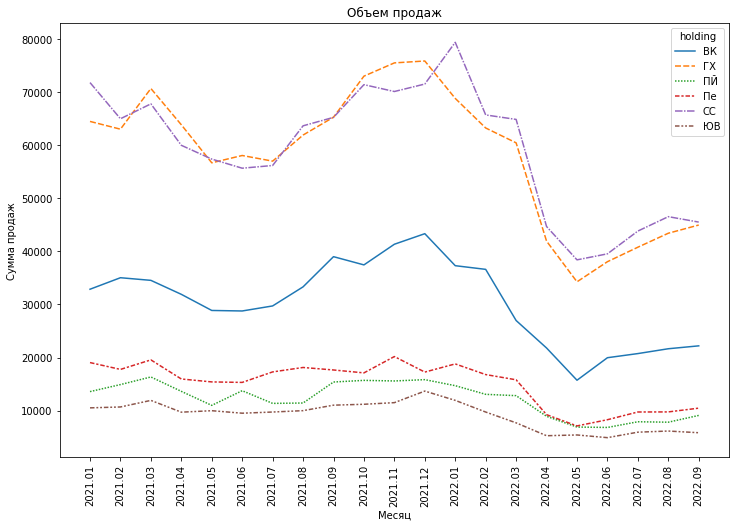

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(data=hold.T)
plt.title(f'Объем продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.show()

По графику видно, что все холдинги подверженны примерно одному тренду в обьеме продаж: рост в зимний сезон, спад в летний. Так же отмечается спад после февраля 2022 в связи с политической ситуацией, и небольшой подьем с мая 2022. Самыми прибыльными можно назвать холдинги СС и ГХ. Средний обьем показывает ВК. Прочие холдинги показывают результаты ниже.

### Группируем по типу рекламы

In [18]:
type = df.pivot_table(index = ['type'], aggfunc = 'sum')#.reset_index()
type

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
type,,,,,,,,,,,,,,,,,,,,,
Классика,202762.9,193614.1,206275.4,184482.5,170379.8,170473.1,174105.3,186330.3,197184.9,207983.2,...,205149.8,221126.7,189712.7,176309.5,126127.4,103633.3,113564.1,125045.7,130257.8,130385.2
Спонсорство,9485.2,12734.8,14500.9,10522.1,8923.0,10591.6,7162.7,12068.8,16354.3,17824.4,...,32271.5,9734.7,15396.4,12263.7,5750.1,4254.0,4059.8,3927.8,5111.3,7716.2


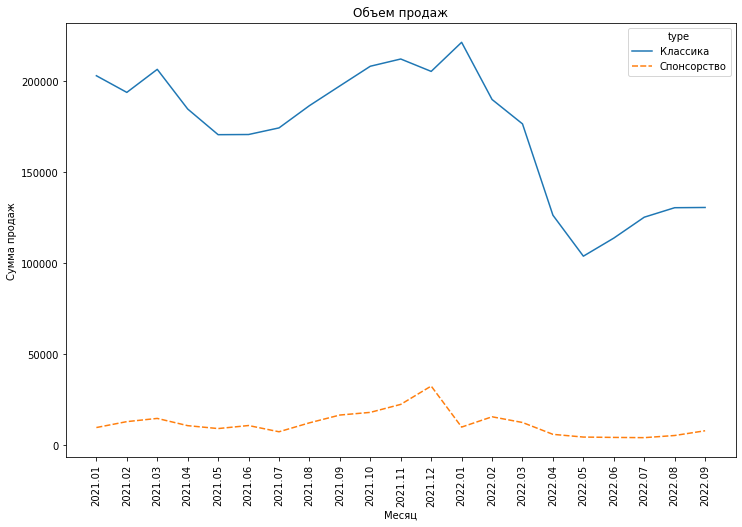

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(data=type.T)
plt.title(f'Объем продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.show()

График показывает, что спонсорский тип рекламы имеет незначительную долю в общем обьеме продаж. Сезонность и влияние политической ситуации так же прослеживаются на этом графике.

### Группируем по группе рекламодателя

In [20]:
group = df.pivot_table(index = ['group'], aggfunc = 'sum')#.reset_index()
group

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
group,,,,,,,,,,,,,,,,,,,,,
Букмекер,909.3,1200.7,1185.1,902.1,1353.7,3452.7,2466.2,1748.6,1396.7,1850.1,...,1821.9,1379.5,4530.6,1452.6,1601.9,1196.8,548.3,587.0,1086.0,1158.6
Другие,211338.8,205148.2,219591.2,194102.5,177949.1,177612.0,178801.8,196650.5,212142.5,223957.5,...,235599.4,229481.9,200578.5,187120.6,130275.6,106690.5,117075.6,128386.5,134283.1,136942.8


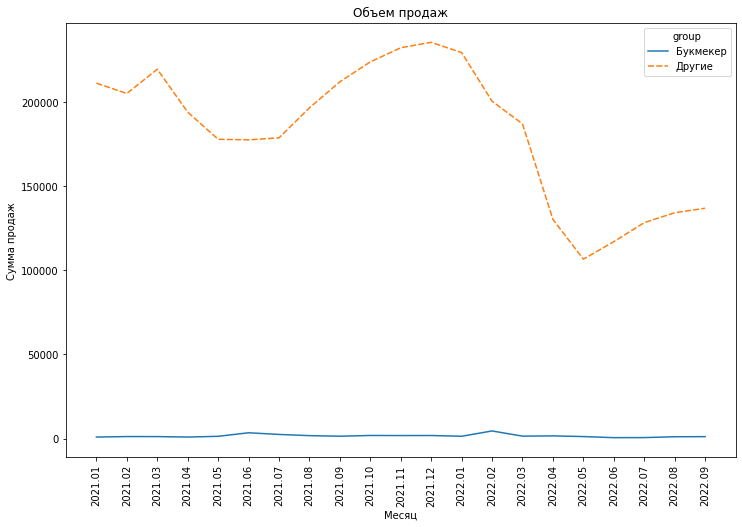

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=group.T)
plt.title(f'Объем продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.show()

Можно селать выводы, что группа рекламодателей "букмекер" практически не приносит доход, и при дальнейшем изучении эти данные можно будет считать выбросом и отбросить. Для других рекламодателей прослеживается та же сезонность

### Группируем по каналу

In [22]:
channel = df.pivot_table(index = ['channel'], aggfunc = 'sum')#.reset_index()
channel

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
channel,,,,,,,,,,,,,,,,,,,,,
1К,13597.4,14917.9,16351.6,13644.7,11004.8,13765.9,11377.8,11448.9,15399.4,15709.2,...,15846.9,14710.6,13082.3,12833.1,8945.6,6927.7,6849.3,7921.4,7838.6,9114.8
2,1356.3,1264.0,1471.1,1231.1,1455.9,1145.4,1177.6,1545.2,1381.1,1382.3,...,1756.4,1631.9,1392.4,1294.2,1027.0,1370.5,1325.8,1333.5,1446.9,1291.7
24,2832.9,3331.7,3563.2,3620.5,3417.5,3178.4,3581.7,4122.3,3670.0,3721.8,...,3574.7,4042.1,5603.2,3911.0,3944.2,2816.1,3261.5,3396.4,2709.4,3656.6
5К,16465.8,16716.7,15987.7,14168.5,13838.4,13088.6,14398.9,16730.1,15772.7,16244.7,...,16954.2,18398.9,15776.4,14871.6,9741.3,7240.3,8293.3,9677.4,10953.1,9575.4
ДЙ,16852.1,13682.5,14158.9,11773.1,10787.2,10723.7,11241.3,12086.0,13043.5,13568.2,...,12165.8,16322.6,13560.1,13262.6,7578.3,7942.5,6605.3,7655.5,8331.4,8423.4
ЗА,7060.9,7050.3,7759.3,5931.7,5808.9,5777.8,6662.5,7453.8,7171.7,6871.4,...,7137.3,7323.2,6038.3,5676.0,3343.6,2698.0,3348.0,3807.3,3814.2,4283.0
КD,3299.6,3671.8,3616.8,3099.0,3352.4,3056.4,2957.5,3437.2,3848.1,3397.9,...,5273.3,3747.7,2996.8,2312.9,1595.9,1692.7,1440.6,1724.1,1764.8,1591.0
КЬ,6460.8,8634.4,7637.2,5867.8,5132.1,4676.3,4738.7,6816.1,7937.8,6864.3,...,9551.3,5678.4,5778.3,3475.0,2094.1,1997.5,2396.3,2868.6,3721.6,2597.5
МЗ,4081.6,3751.6,3828.5,3311.5,3384.1,3348.8,3006.0,2885.6,3237.1,3656.2,...,4288.4,4301.9,3278.6,3073.8,2180.1,2047.2,1906.0,2352.5,2474.5,2233.2


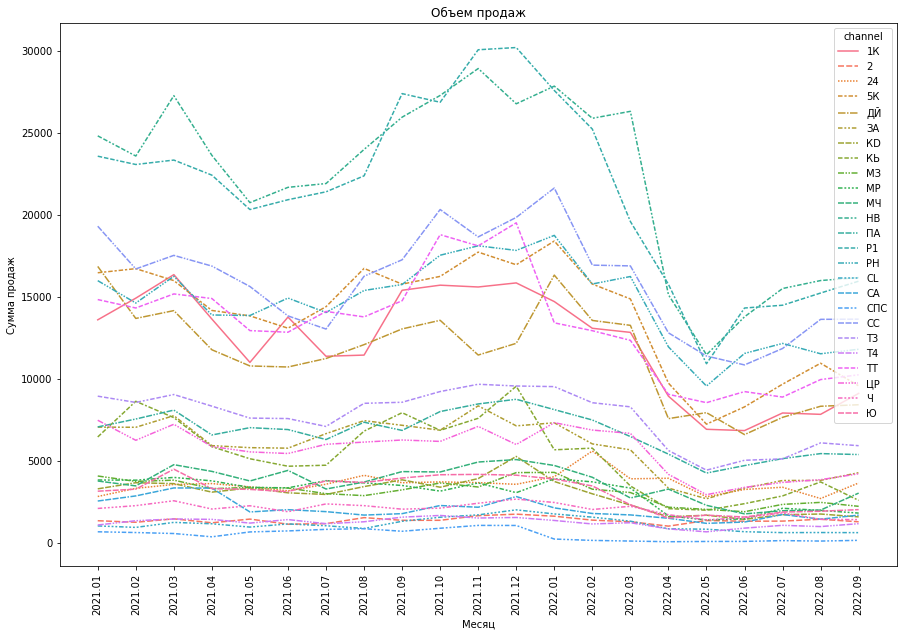

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(data=channel.T)
plt.title(f'Объем продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.show()

Данный график показывает, что сезонность прослеживается для каналов, которые составляют большую часть обьема продаж. Каналы с меньшим обьемом так же показывают снижение обьема на фоне политической ситуации, но незначительно.

### Группируем по рекламодателю

In [24]:
advertiser = df.pivot_table(index = ['advertiser'], aggfunc = 'sum')#.reset_index()
advertiser

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09
advertiser,,,,,,,,,,,,,,,,,,,,,
1XСТАВКА,0.0,0.0,0.0,0.0,0.0,62.8,97.6,33.8,141.1,155.0,...,117.8,0.0,481.4,354.5,312.8,277.7,294.1,297.9,317.0,291.0
1С,0.0,0.0,5.9,8.2,0.0,0.0,0.0,0.0,8.3,9.6,...,22.2,0.0,0.0,15.2,12.1,0.0,0.0,0.0,0.0,0.0
585 ЗОЛОТОЙ (СЕТЬ МАГАЗИНОВ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,94.3,65.3,0.0,0.0,0.0,0.0,0.0,0.0
7 ДНЕЙ,0.0,27.5,0.0,0.0,10.8,0.0,0.0,0.0,0.2,0.4,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.4
A&D,325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,406.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ЮНИТОЙС,4.1,29.8,8.0,0.0,10.2,0.0,0.0,0.0,6.1,4.2,...,10.2,0.0,2.5,6.8,11.3,2.8,0.0,10.4,0.0,0.0
ЯБЛОКО (ДВИЖЕНИЕ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.7,147.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ЯНДЕКС,5535.7,5752.9,5554.0,4911.0,3611.8,3127.8,2845.8,4579.8,5256.3,5499.5,...,4423.8,1641.9,1988.6,3402.8,3855.1,4465.0,2517.7,5365.8,3386.9,2171.7


In [25]:
advertiser['total'] = advertiser.apply(lambda x: x.sum(), axis=1)

In [26]:
advertiser

,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,...,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,total
advertiser,,,,,,,,,,,,,,,,,,,,,
1XСТАВКА,0.0,0.0,0.0,0.0,0.0,62.8,97.6,33.8,141.1,155.0,...,0.0,481.4,354.5,312.8,277.7,294.1,297.9,317.0,291.0,3408.4
1С,0.0,0.0,5.9,8.2,0.0,0.0,0.0,0.0,8.3,9.6,...,0.0,0.0,15.2,12.1,0.0,0.0,0.0,0.0,0.0,81.5
585 ЗОЛОТОЙ (СЕТЬ МАГАЗИНОВ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,94.3,65.3,0.0,0.0,0.0,0.0,0.0,0.0,159.6
7 ДНЕЙ,0.0,27.5,0.0,0.0,10.8,0.0,0.0,0.0,0.2,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.4,42.6
A&D,325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ЮНИТОЙС,4.1,29.8,8.0,0.0,10.2,0.0,0.0,0.0,6.1,4.2,...,0.0,2.5,6.8,11.3,2.8,0.0,10.4,0.0,0.0,112.2
ЯБЛОКО (ДВИЖЕНИЕ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.7,147.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0
ЯНДЕКС,5535.7,5752.9,5554.0,4911.0,3611.8,3127.8,2845.8,4579.8,5256.3,5499.5,...,1641.9,1988.6,3402.8,3855.1,4465.0,2517.7,5365.8,3386.9,2171.7,84407.3


In [27]:
tot = advertiser.sort_values(by=['total'], ascending = False).head(10)
tot.drop(columns = ['total'],axis = 1, inplace=True)

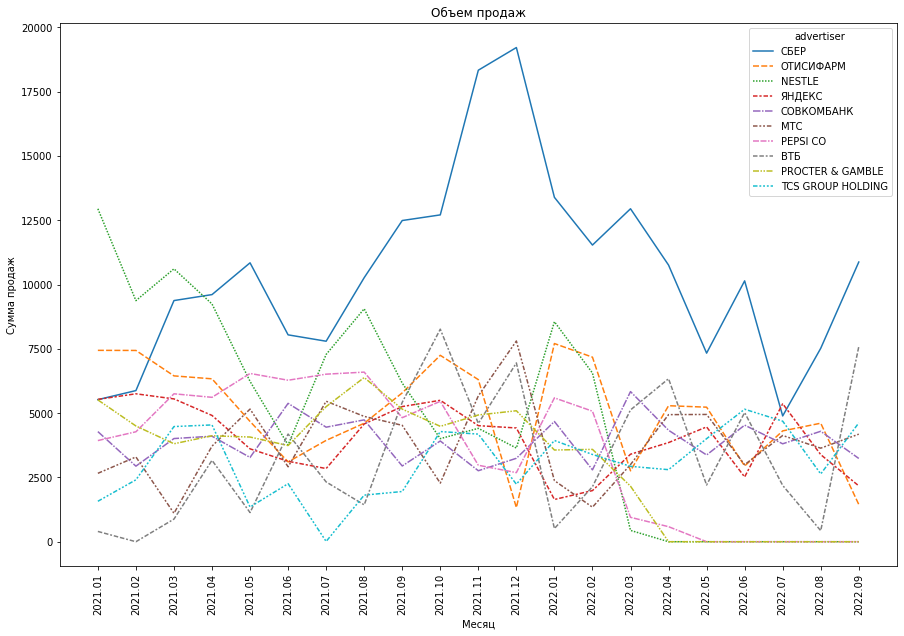

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=tot.T)
plt.title(f'Объем продаж')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.show()

Изучив 10 рекламодателей с самым высоким обьемом продаж, можно сказать что сезонность здесь не замечена, у каждой компании она своя.

### Вывод

Выше я выполнила базовый анализ продаж, основываясь на имеющиеся признаки. Дополнительно можно выполнить следующий анализ:
- Делить данные по нескольким признакам. Например сначала разделить данные по холдингам, далее посмотреть на распределение данных по телеканалам внутри холдингов. 
- Посмотреть какие холдинги/каналы в приоритете у рекламодателей.
- Сравнивать обьемы продаж за различные периоды двух лет.

## Прогноз продаж

Для примера сделаю прогноз по холдингу ГХ

In [29]:
data = hold.query('holding == "ГХ"')
data = data.T

In [30]:
data.index = pd.to_datetime(data.index)
data.columns = ['sales']

In [31]:
def make_features(data, max_lag):
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['sales'].shift(lag)
    data = data.dropna()
    return data

In [32]:
data = make_features(data, 2)

,sales,lag_1,lag_2
2021-03-01,70635.1,62982.6,64441.4
2021-04-01,63812.8,70635.1,62982.6
2021-05-01,56655.6,63812.8,70635.1
2021-06-01,58029.9,56655.6,63812.8
2021-07-01,56968.0,58029.9,56655.6
2021-08-01,61876.6,56968.0,58029.9
2021-09-01,65235.7,61876.6,56968.0
2021-10-01,72963.2,65235.7,61876.6
2021-11-01,75457.1,72963.2,65235.7
2021-12-01,75815.8,75457.1,72963.2


In [33]:
# выделяю целевой признак
features = data.drop(['sales'], axis = 1).values
target = data['sales'].values

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

### RandomForest

In [35]:
model = RandomForestRegressor(random_state = 12345)
parametrs = {'n_estimators': range (35, 45, 1), 'min_samples_leaf': range (1, 10, 1)}
grid = GridSearchCV(model, parametrs, cv = tscv, scoring = 'neg_root_mean_squared_error')
grid.fit(features, target)
grid.best_params_

{'min_samples_leaf': 2, 'n_estimators': 36}

In [36]:
print('RMSE = ', abs(grid.best_score_))

RMSE =  9308.419550726598


In [37]:
grid.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=36, random_state=12345)

### Предсказание

In [38]:
def pred (df, date):
    d = df.copy()
    d.loc[date] = [0,
                      d.iloc[-1,0],
                      d.iloc[-1,1]
                     ]
    to_pred = d.drop(['sales'], axis = 1)
    to_pred = to_pred.iloc[-2:-1].values
    
    model = RandomForestRegressor(random_state = 12345, min_samples_leaf = 2, n_estimators = 36)
    model.fit(features, target)
    prediction = model.predict(to_pred)
    d.iloc[-1,0] = prediction
    return d

In [39]:
date = datetime.datetime(2022,10,1)
data = pred(data, date)

In [40]:
date = datetime.datetime(2022,11,1)
data = pred(data, date)

In [41]:
date = datetime.datetime(2022,12,1)
data = pred(data, date)

In [43]:
print('Прогнозируемые продажи в октябре 2022 составят:', round(data.iloc[-3,-3], 1))
print('Прогнозируемые продажи в ноябре 2022 составят:', round(data.iloc[-2,-3], 1))
print('Прогнозируемые продажи в декабре 2022 составят:', round(data.iloc[-1,-3], 1))

Прогнозируемые продажи в октябре 2022 составят: 41597.0
Прогнозируемые продажи в ноябре 2022 составят: 39811.3
Прогнозируемые продажи в декабре 2022 составят: 39041.0


## Кластеризация рекламодателей

### По количеству месяцев с заказами

In [44]:
advertiser.reset_index()

,advertiser,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,...,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,total
0,1XСТАВКА,0.0,0.0,0.0,0.0,0.0,62.8,97.6,33.8,141.1,...,0.0,481.4,354.5,312.8,277.7,294.1,297.9,317.0,291.0,3408.4
1,1С,0.0,0.0,5.9,8.2,0.0,0.0,0.0,0.0,8.3,...,0.0,0.0,15.2,12.1,0.0,0.0,0.0,0.0,0.0,81.5
2,585 ЗОЛОТОЙ (СЕТЬ МАГАЗИНОВ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,94.3,65.3,0.0,0.0,0.0,0.0,0.0,0.0,159.6
3,7 ДНЕЙ,0.0,27.5,0.0,0.0,10.8,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.4,42.6
4,A&D,325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,ЮНИТОЙС,4.1,29.8,8.0,0.0,10.2,0.0,0.0,0.0,6.1,...,0.0,2.5,6.8,11.3,2.8,0.0,10.4,0.0,0.0,112.2
858,ЯБЛОКО (ДВИЖЕНИЕ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.7,147.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0
859,ЯНДЕКС,5535.7,5752.9,5554.0,4911.0,3611.8,3127.8,2845.8,4579.8,5256.3,...,1641.9,1988.6,3402.8,3855.1,4465.0,2517.7,5365.8,3386.9,2171.7,84407.3
860,ЯСНАЯ ПОЛЯНА (МУЗЕЙ),0.0,0.0,0.0,0.0,0.0,11.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.3


In [45]:
#посчитаем сколько месяцев клиент заказывал рекламу
advertiser['count'] = advertiser[advertiser.iloc[:,2:-1] > 0].count(axis=1)

<AxesSubplot:>

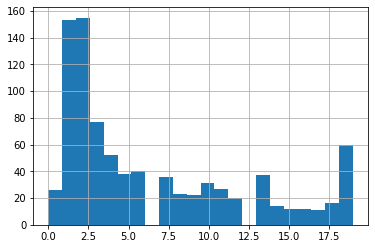

In [47]:
advertiser['count'].hist(bins = 22)

In [48]:
def freq_class(col):
    if col <= 7:
        return 'rare'
    elif 13 >= col > 7:
        return 'avarage'
    else:
        return 'often'

In [49]:
advertiser['freq_class'] = advertiser['count'].apply(freq_class)

In [50]:
advertiser['freq_class'].value_counts().sort_values()

oft     125
mid     160
rare    577
Name: freq_class, dtype: int64

### По обьему продаж

In [51]:
# рассчитаем какой процент от продаж принес каждій рекламодатель за весь период
advertiser['persentage'] = advertiser['total']/advertiser['total'].sum()*100

In [52]:
advertiser['persentage'].sort_values(ascending = False)

advertiser
СБЕР                5.672645
ОТИСИФАРМ           2.742813
NESTLE              2.643824
ЯНДЕКС              2.181223
СОВКОМБАНК          2.143504
                      ...   
IVC GROUP           0.000010
СТОЛБУШИНО          0.000008
ИП ЛЕОНТЬЕВ О.В.    0.000008
РУССКОЕ ПОЛЕ        0.000008
ЭКСПОДИЗАЙН         0.000003
Name: persentage, Length: 862, dtype: float64

<AxesSubplot:>

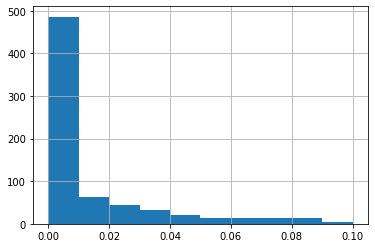

In [53]:
advertiser['persentage'].hist(bins = 10, range = (0, 0.1))

In [54]:
def vol_class(col):
    if col < 0.1:
        return 'low'
    elif 1 > col >= 0.1:
        return 'avarage'
    else:
        return 'high'

In [55]:
advertiser['volume_class'] = advertiser['persentage'].apply(vol_class)

In [62]:
advertiser['volume_class'].value_counts().sort_values()

high        26
avarage    131
low        705
Name: volume_class, dtype: int64

Так же можно кластеризировать клиентов по активности (активен клиент в последние пол года или нет), по среднемесячному доходу от рекламы, а так же прочим признакам, которые важны для дальнейшей аналитики